In [ ]:
import pandas as pd

In [ ]:
#Loading 4.1
#df = pd.read_csv('https://raw.githubusercontent.com/happy522/ChatGPT-as-a-CAT-tool-in-Easy-language-translation_Implemenatation/refs/heads/main/GPT_4_1/Holistic%20and%20Linguistic%20Data%20GPT-4.1.csv')
df = pd.read_csv('df.csv')
#Loading 4.0
#df = pd.read_csv('https://raw.githubusercontent.com/happy522/ChatGPT-as-a-CAT-tool-in-Easy-language-translation_Implemenatation/refs/heads/main/GPT_4_o/Holistic%20and%20Linguistic%20Data%20GPT-4.o.csv')

In [ ]:
df = df.replace(r'\n', ' ', regex=True)

In [ ]:
df

,ID,Text,Holistic,Linguistic
0,BN_1,BAföG (für Schüler) __________________________...,BAföG (für Schüler) BAföG ist eine finanziell...,BAföG (für Schüler) Das BAföG ist eine finan...
1,BN_10,"Eltern, die in der Stadt Hildesheim ihren Wohn...",In Hildesheim können Eltern für ihre Babys Elt...,"Eltern, die in der Stadt Hildesheim ihren Wohn..."
2,BN_2,Fundsachen ___________________________________...,Wenn du etwas Wertvolles (das mehr als 10 Euro...,Gefundene Wertgegenstände mit einem Gegenwert ...
3,BN_3,"Kindertagesstätte, Platzvermittlung und Voranm...","Der Kita-Finder ist eine Webseite, auf der Elt...","Der Kita-Finder ist eine Webseite, auf der Sie..."
4,BN_4,Allgemeine Informationen Sie sind aus Ihrer W...,Du bist aus deiner Wohnung in Hannover ausgezo...,Allgemeine Informationen: Sie sind aus Ihrer...
5,BN_5,Elterngeld und Elternzeit ____________________...,Elterngeld und Elternzeit sind Leistungen vom ...,Elterngeld und Elternzeit Elterngeld ist ein...
6,BN_6,Führungszeugnis _____________________________...,"Das Führungszeugnis ist eine Urkunde, die man ...",Informationen zum Beantragen eines Führungszeu...
7,BN_7,Zweitwohnungssteuer _________________________...,"Es gibt eine neue Steuer, die Zweitwohnungsste...",Die Zweitwohnungssteuer ist eine örtliche Steu...
8,BN_8,Anmeldung einer Eheschliessung Die beabsichti...,"Wenn du heiraten möchtest, musst du das beim S...",Anmeldung einer Eheschließung Wenn man heira...
9,BN_9,Eintragung in das Wählerverzeichnis zur Landta...,Du darfst bei der Landtagswahl in Niedersachse...,Eintragung in das Wählerverzeichnis zur Landta...


In [ ]:
!python -m spacy download de_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 97.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy

# Load German spaCy model
nlp = spacy.load("de_core_news_sm")

df.rename(columns={ "Text": "Original"}, inplace=True)

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_readability_scores(df, metric_prefix,name, output_dir="plot_4_0"):
    """
    Creates and saves a boxplot for readability metrics.

    Parameters:
    - df: pandas DataFrame containing readability columns.
    - metric_prefix: string prefix like "Fog" or "FRE".
    - output_dir: directory where the plot will be saved (default: "plots").

    """
    # Define columns
    metric_cols = [f"{metric_prefix}_Original", f"{metric_prefix}_Holistic", f"{metric_prefix}_Linguistic"]

    # Check if all columns exist
    for col in metric_cols:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

    # Melt for seaborn
    df_melted = df.melt(value_vars=metric_cols,
                        var_name="Metric",
                        value_name="Score")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_melted, x="Metric", y="Score", hue="Metric", palette="pastel", legend=False)

    plt.title(f"{name} Comparison")
    plt.ylabel("Score")
    plt.xlabel("Text Type")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    # Save
    os.makedirs(output_dir, exist_ok=True)
    file_path = os.path.join(output_dir, f"{name}_readability_boxplot.png")
    plt.savefig(file_path, dpi=300)
    plt.show()


    plt.close()

    print(f"Plot saved to: {file_path}")


# Lexical Measures

### TTR (Type-Token Ratio)

A **lexical measure** used to assess the **diversity of vocabulary** in a text.

---

### **How it works:**

* **Types** = unique words in the text
* **Tokens** = total number of words (including repetitions)

**Formula:**

$$
\text{TTR} = \frac{\text{Number of Unique Words (Types)}}{\text{Total Number of Words (Tokens)}}
$$

---

### Example:

Text: `"Der Hund läuft und der Hund bellt."`

* **Tokens** = 7 (Der, Hund, läuft, und, der, Hund, bellt)
* **Types** = 5 (Der, Hund, läuft, und, bellt)
* **TTR** = 5 / 7 ≈ **0.714**

If a text has a **higher TTR**, it means:

* More varied vocabulary (greater lexical richness)

A **lower TTR** means:

* Repetition or simpler, limited vocabulary


       ID  TTR_Original  TTR_Holistic  TTR_Linguistic
0    BN_1         0.673         0.587           0.549
1   BN_10         0.601         0.541           0.487
2    BN_2         0.545         0.680           0.540
3    BN_3         0.635         0.691           0.634
4    BN_4         0.591         0.789           0.582
5    BN_5         0.512         0.610           0.517
6    BN_6         0.487         0.700           0.478
7    BN_7         0.581         0.643           0.571
8    BN_8         0.547         0.671           0.555
9    BN_9         0.407         0.737           0.410
10    K_1         0.539         0.644           0.605
11   K_10         0.614         0.514           0.510
12    K_2         0.494         0.705           0.593
13    K_3         0.508         0.719           0.578
14    K_4         0.599         0.609           0.621
15    K_5         0.565         0.635           0.594
16    K_6         0.468         0.734           0.612
17    K_7         0.552     

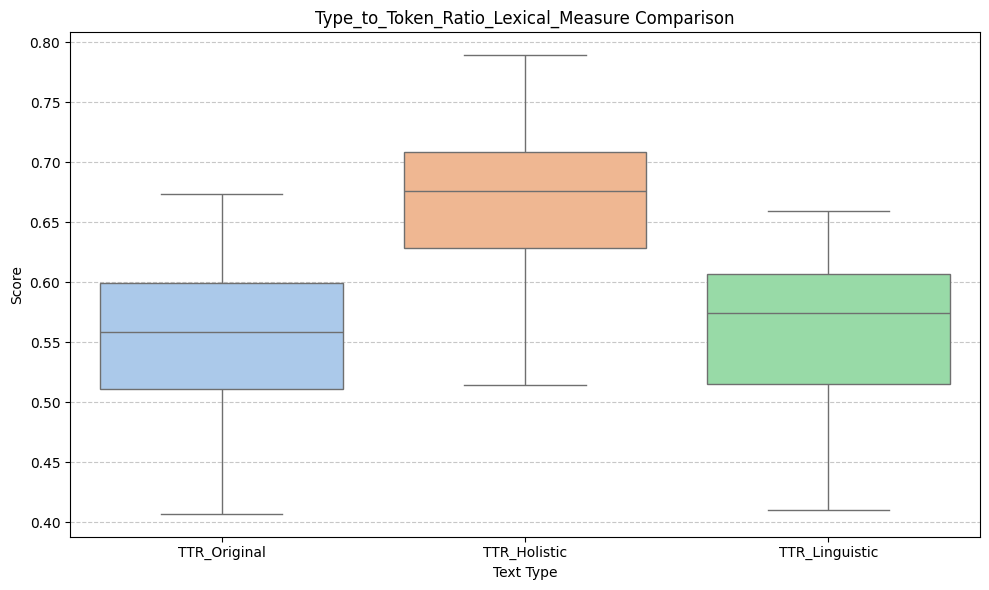

Plot saved to: plot_4_0/Type_to_Token_Ratio_Lexical_Measure_readability_boxplot.png


In [ ]:
def compute_ttr(text):
    doc = nlp(text)
    words = [token.text.lower() for token in doc if token.is_alpha]

    total_tokens = len(words)
    unique_types = len(set(words))

    if total_tokens == 0:
        return 0.0
    return round(unique_types / total_tokens, 3)
df["TTR_Original"] = df["Original"].apply(compute_ttr)
df["TTR_Holistic"] = df["Holistic"].apply(compute_ttr)
df["TTR_Linguistic"] = df["Linguistic"].apply(compute_ttr)

print(df[["ID", "TTR_Original", "TTR_Holistic", "TTR_Linguistic"]])
plot_readability_scores(df, "TTR" ,"Type_to_Token_Ratio_Lexical_Measure",output_dir="plot_4_0")



### Lexical Density

A **lexical measure** that indicates the **proportion of content words** (nouns, verbs, adjectives, adverbs) relative to all words in a text.

---

### **How it works:**

* **Content Words** = nouns, main verbs, adjectives, adverbs
* **Total Words** = all words in the text (including function words like articles, pronouns, prepositions, conjunctions)

**Formula:**

$$
\text{Lexical Density} = \frac{\text{Number of Content Words}}{\text{Total Number of Words}}
$$

---

### Example:

Text: `"Der kleine Hund bellt laut im Garten."`

* **Tokens** = 7 (Der, kleine, Hund, bellt, laut, im, Garten)
* **Content Words** = 5 (kleine, Hund, bellt, laut, Garten)
* **Lexical Density** = 5 / 7 ≈ **0.714**

A **higher lexical density** means:

* More informational content (text is more content-heavy)

A **lower lexical density** means:

* Text is more function-heavy (simpler, more conversational or explanatory)


       ID  LD_Original  LD_Holistic  LD_Linguistic
0    BN_1        0.497        0.471          0.469
1   BN_10        0.508        0.447          0.501
2    BN_2        0.494        0.426          0.456
3    BN_3        0.453        0.443          0.410
4    BN_4        0.494        0.434          0.490
5    BN_5        0.502        0.496          0.487
6    BN_6        0.496        0.489          0.475
7    BN_7        0.480        0.464          0.458
8    BN_8        0.519        0.483          0.487
9    BN_9        0.458        0.404          0.399
10    K_1        0.527        0.474          0.497
11   K_10        0.550        0.524          0.464
12    K_2        0.522        0.475          0.563
13    K_3        0.527        0.521          0.474
14    K_4        0.507        0.514          0.495
15    K_5        0.497        0.455          0.456
16    K_6        0.487        0.447          0.500
17    K_7        0.478        0.455          0.455
18    K_8        0.527        0

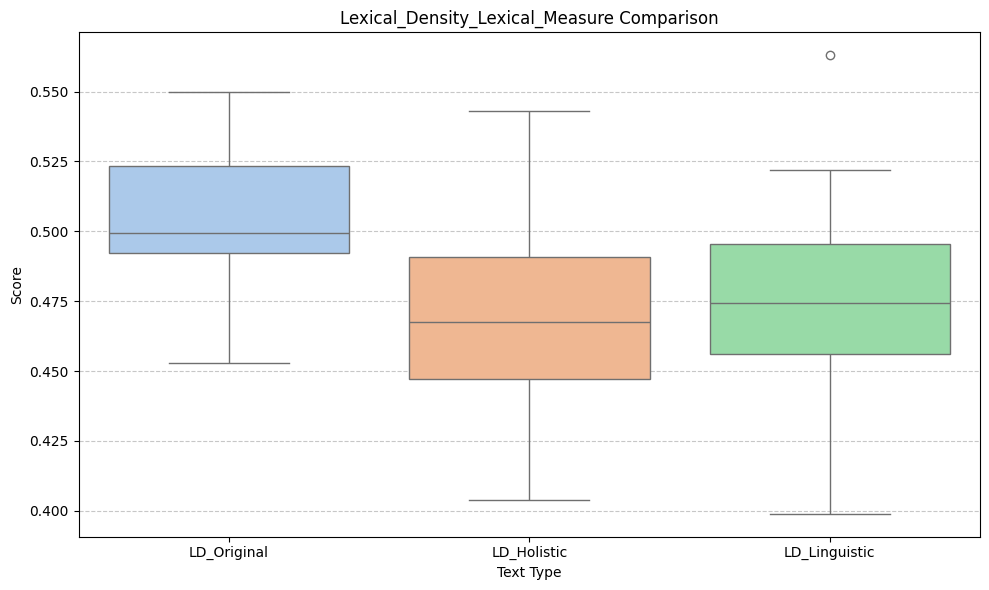

Plot saved to: plot_4_0/Lexical_Density_Lexical_Measure_readability_boxplot.png


In [ ]:

def compute_lexical_density(text):
    doc = nlp(text)
    words = [token for token in doc if token.is_alpha]

    total_words = len(words)
    content_words = [token for token in words if token.pos_ in {"NOUN", "VERB", "ADJ", "ADV"}]

    if total_words == 0:
        return 0.0
    return round(len(content_words) / total_words, 3)

df["LD_Original"] = df["Original"].apply(compute_lexical_density)
df["LD_Holistic"] = df["Holistic"].apply(compute_lexical_density)
df["LD_Linguistic"] = df["Linguistic"].apply(compute_lexical_density)

print(df[["ID", "LD_Original", "LD_Holistic", "LD_Linguistic"]])
plot_readability_scores(df, "LD","Lexical_Density_Lexical_Measure", output_dir="plot_4_0")




### Word Rarity

A **lexical measure** used to assess the **uncommonness or frequency** of words in a text, based on a reference corpus or frequency list.

---

### **How it works:**

* Each word is compared to a frequency list from a large corpus - here spacy
* Words are classified as **common** or **rare** based on how often they appear in the language
* The proportion or count of **rare words** is used to measure lexical sophistication

---

### Example:

Text: `"Der Archäologe untersuchte das antike Artefakt."`

* **Tokens** = 7 (Der, Archäologe, untersuchte, das, antike, Artefakt)
* **Rare Words** = 3 (Archäologe, antike, Artefakt)
* **Word Rarity Score** = 3 / 7 ≈ **0.429**

A **higher word rarity score** means:

* The text contains more **unusual, domain-specific, or academic** vocabulary

A **lower word rarity score** means:

* The vocabulary is **more common**, suggesting the text is simpler and easier to understand



       ID  WR_Original  WR_Holistic  WR_Linguistic
0    BN_1        0.526        0.446          0.434
1   BN_10        0.488        0.421          0.461
2    BN_2        0.448        0.361          0.449
3    BN_3        0.445        0.433          0.440
4    BN_4        0.482        0.421          0.472
5    BN_5        0.458        0.447          0.450
6    BN_6        0.492        0.411          0.481
7    BN_7        0.480        0.417          0.425
8    BN_8        0.494        0.349          0.414
9    BN_9        0.446        0.368          0.392
10    K_1        0.535        0.400          0.426
11   K_10        0.531        0.470          0.441
12    K_2        0.543        0.377          0.533
13    K_3        0.531        0.417          0.432
14    K_4        0.514        0.507          0.472
15    K_5        0.465        0.407          0.422
16    K_6        0.500        0.394          0.474
17    K_7        0.472        0.424          0.420
18    K_8        0.497        0

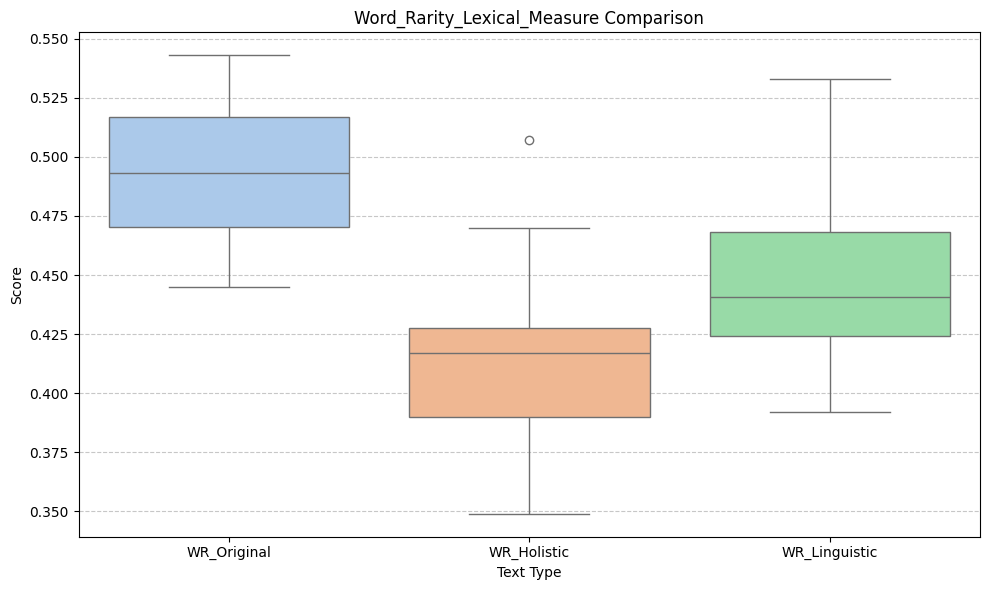

Plot saved to: plot_4_0/Word_Rarity_Lexical_Measure_readability_boxplot.png


In [ ]:

def compute_word_rarity(text):
    doc = nlp(text)

    words = [token.text.lower() for token in doc if token.is_alpha]
    total_words = len(words)

    # Heuristic: rare words = not in vocab or appear very infrequently in the model
    rare_words = [
        word for word in words
        if not nlp.vocab[word].has_vector and not nlp.vocab[word].is_stop
    ]

    if total_words == 0:
        return 0.0
    return round(len(rare_words) / total_words, 3)
df["WR_Original"] = df["Original"].apply(compute_word_rarity)
df["WR_Holistic"] = df["Holistic"].apply(compute_word_rarity)
df["WR_Linguistic"] = df["Linguistic"].apply(compute_word_rarity)

print(df[["ID", "WR_Original", "WR_Holistic", "WR_Linguistic"]])
plot_readability_scores(df, "WR","Word_Rarity_Lexical_Measure", output_dir="plot_4_0")


# Syntactic Measures

### MDD (Mean Dependency Distance)

A **syntactic measure** used to assess the **complexity of sentence structure** based on the average distance between dependent words and their heads.

---

### **How it works:**

* A **dependency distance** is the number of words between a **dependent** and its **head** in a syntactic dependency tree
* Only non-root and non-punctuation dependencies are counted
* The **average** of all these distances in a sentence is the **MDD**

**Formula:**

$$
\text{MDD} = \frac{\sum |\text{position}_{\text{head}} - \text{position}_{\text{dependent}}|}{\text{Number of dependencies}}
$$

---

### Example:

Text: `"Der Junge, der einen Hund hat, spielt im Garten."`

Syntactic dependencies (simplified):

* "Junge" → "spielt" (distance = 4)
* "der" → "Junge" (1)
* "einen" → "Hund" (1)
* "Hund" → "hat" (2)
* "hat" → "der" (2)
* "im" → "Garten" (1)
* "Garten" → "spielt" (3)

- **Total Dependencies Considered** = 7
- **Sum of Distances** = 4 + 1 + 1 + 2 + 2 + 1 + 3 = 14
- **MDD** = 14 / 7 = **2.0**

---

A **higher MDD** indicates:

* More **syntactically complex** structures (e.g., embedded clauses, distant relations)

A **lower MDD** suggests:

* **Simpler, more linear** sentence construction, often found in easy or plain language texts


       ID  MDD_Original  MDD_Holistic  MDD_Linguistic
0    BN_1         3.024         2.402           2.570
1   BN_10         3.429         2.362           3.633
2    BN_2         3.182         2.487           2.879
3    BN_3         2.317         3.274           2.915
4    BN_4         2.851         2.400           2.398
5    BN_5         2.496         2.588           2.638
6    BN_6         2.839         2.595           2.744
7    BN_7         3.195         2.481           3.128
8    BN_8         2.986         2.585           2.979
9    BN_9         2.305         3.196           3.024
10    K_1         2.727         2.523           2.882
11   K_10         2.372         2.311           2.891
12    K_2         2.676         2.431           3.556
13    K_3         2.529         2.567           2.489
14    K_4         2.898         2.155           2.584
15    K_5         2.751         2.591           2.682
16    K_6         3.297         2.292           2.742
17    K_7         2.785     

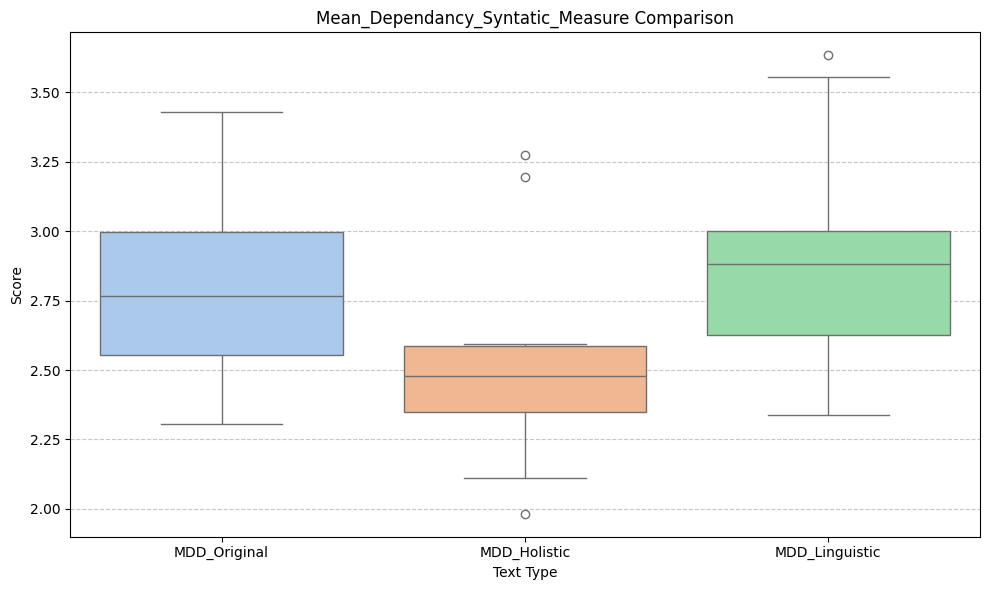

Plot saved to: plot_4_0/Mean_Dependancy_Syntatic_Measure_readability_boxplot.png


In [ ]:
def compute_mdd(text):
    doc = nlp(text)
    distances = [
        abs(token.head.i - token.i)
        for token in doc
        if token.dep_ != "ROOT" and not token.is_punct
    ]
    if distances:
        return round(sum(distances) / len(distances), 3)
    else:
        return 0.0


# Compute MDD for each version
df["MDD_Original"] = df["Original"].apply(compute_mdd)
df["MDD_Holistic"] = df["Holistic"].apply(compute_mdd)
df["MDD_Linguistic"] = df["Linguistic"].apply(compute_mdd)

# Output results
print(df[["ID", "MDD_Original", "MDD_Holistic", "MDD_Linguistic"]])
plot_readability_scores(df, "MDD","Mean_Dependancy_Syntatic_Measure", output_dir="plot_4_0")

### Subordination Index

A **syntactic measure** used to assess the **complexity of sentence structure** by quantifying the use of subordinate clauses.

---

### **How it works:**

* Count the number of **finite verbs** in the text (each typically indicates a clause)
* Count how many of these occur in **subordinate clauses** (not the main/root clause)
* Calculate the **proportion** of subordinate clauses relative to all clauses

**Formula:**

$$
\text{Subordination Index} = \frac{\text{Number of Subordinate Clauses}}{\text{Total Number of Clauses (Finite Verbs)}}
$$

---

### Example:

Text: `"Der Mann, der das Auto fährt, ist mein Onkel."`

* **Finite verbs** = 2 (`fährt`, `ist`)
* **Subordinate clause** = 1 (`der das Auto fährt`)
* **Subordination Index** = 1 / 2 = **0.5**

---

A **higher subordination index** means:

* The text uses more **embedded/subordinate structures**, indicating **greater syntactic complexity**

A **lower subordination index** means:

* The text is **flatter**, using mostly **main clauses** (typical of easy or plain language)



       ID  SI_Original  SI_Holistic  SI_Linguistic
0    BN_1        0.167        0.556          0.438
1   BN_10        0.423        0.263          0.500
2    BN_2        0.345        0.467          0.308
3    BN_3        0.000        0.429          0.200
4    BN_4        0.312        0.143          0.297
5    BN_5        0.265        0.357          0.320
6    BN_6        0.512        0.417          0.436
7    BN_7        0.318        0.500          0.429
8    BN_8        0.392        0.591          0.571
9    BN_9        0.226        0.667          0.636
10    K_1        0.139        0.438          0.522
11   K_10        0.214        0.444          0.435
12    K_2        0.185        0.444          0.647
13    K_3        0.382        0.462          0.444
14    K_4        0.529        0.476          0.400
15    K_5        0.306        0.381          0.364
16    K_6        0.393        0.429          0.706
17    K_7        0.355        0.250          0.500
18    K_8        0.323        0

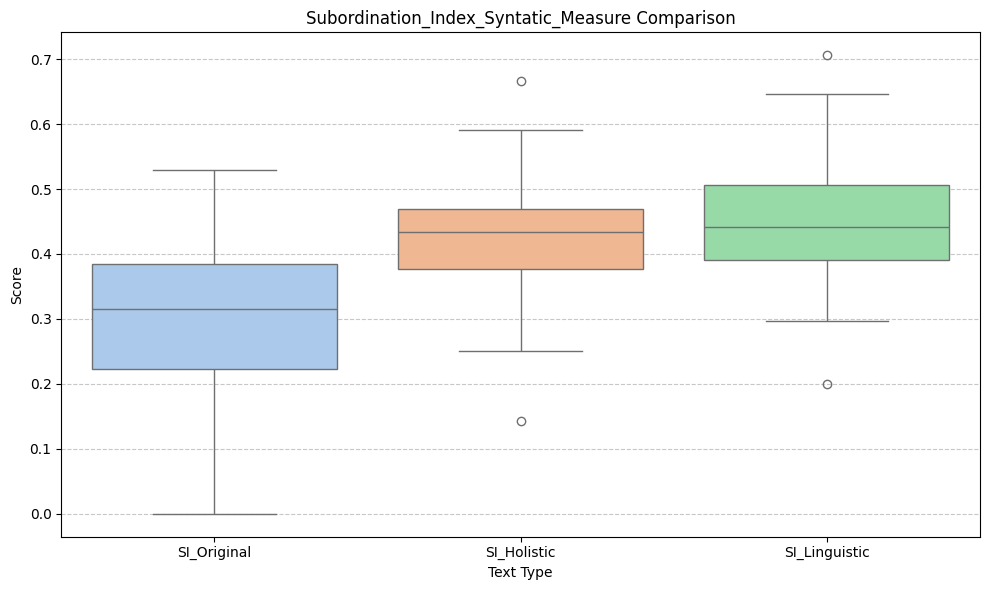

Plot saved to: plot_4_0/Subordination_Index_Syntatic_Measure_readability_boxplot.png


In [ ]:
# Dependency labels often marking subordination in German
subordinate_labels = {"neb", "advcl", "ccomp", "xcomp", "acl", "relcl"}

def compute_subordination_index(text):
    doc = nlp(text)

    finite_verbs = [token for token in doc if token.pos_ in {"VERB", "AUX"} and "Fin" in token.morph.get("VerbForm")]

    total_clauses = len(finite_verbs)
    subordinate_clauses = sum(1 for token in finite_verbs if token.dep_ != "ROOT")

    if total_clauses == 0:
        return 0.0
    return round(subordinate_clauses / total_clauses, 3)

df["SI_Original"] = df["Original"].apply(compute_subordination_index)
df["SI_Holistic"] = df["Holistic"].apply(compute_subordination_index)
df["SI_Linguistic"] = df["Linguistic"].apply(compute_subordination_index)

print(df[["ID", "SI_Original", "SI_Holistic", "SI_Linguistic"]])
plot_readability_scores(df, "SI", "Subordination_Index_Syntatic_Measure",output_dir="plot_4_0")

### Dependency Crossings

A **syntactic measure** that captures the **non-linearity or complexity** of sentence structure by identifying **crossing dependencies** in a sentence.

---

### **How it works:**

* In a syntactic dependency tree, **each word (dependent)** is connected to its **governing word (head)**
* If two dependency arcs **cross** when visualized over the sentence linearly, it is called a **crossing**
* Dependency crossings are rare in simple language and often indicate **syntactic complexity**

---

### Visual Explanation:

For the sentence `"Der Junge, den das Mädchen kennt, lacht."`

Dependencies:

* "Junge" → "lacht"
* "den" → "Junge"
* "Mädchen" → "kennt"
* "kennt" → "den"
* **Crossing occurs** between the arcs:

  * "Junge" → "lacht" and
  * "kennt" → "den"

- This is because "kennt" and "den" are in a subordinate clause embedded between the main clause dependencies

---

### Result:

* **Total Dependencies** = 5
* **Crossing Dependencies** = 1
* **Crossing Index** = 1 / 5 = **0.2**

---

A **higher number of dependency crossings** means:

* More **syntactic embedding** or **complex sentence construction**

A **lower or zero value** means:

* The syntax is **linear and simple** — common in easy-to-understand language


       ID  Cross_Original  Cross_Holistic  Cross_Linguistic
0    BN_1               4               4                 5
1   BN_10               5               0                 1
2    BN_2               4               2                 8
3    BN_3               0               2                 2
4    BN_4               5               0                 3
5    BN_5               4               0                 1
6    BN_6               7               1                 6
7    BN_7               2               1                 6
8    BN_8              19               0                11
9    BN_9               2               0                12
10    K_1               6               1                 5
11   K_10               0               1                 2
12    K_2               2               0                 0
13    K_3              11               1                 0
14    K_4               4               0                 1
15    K_5               2               

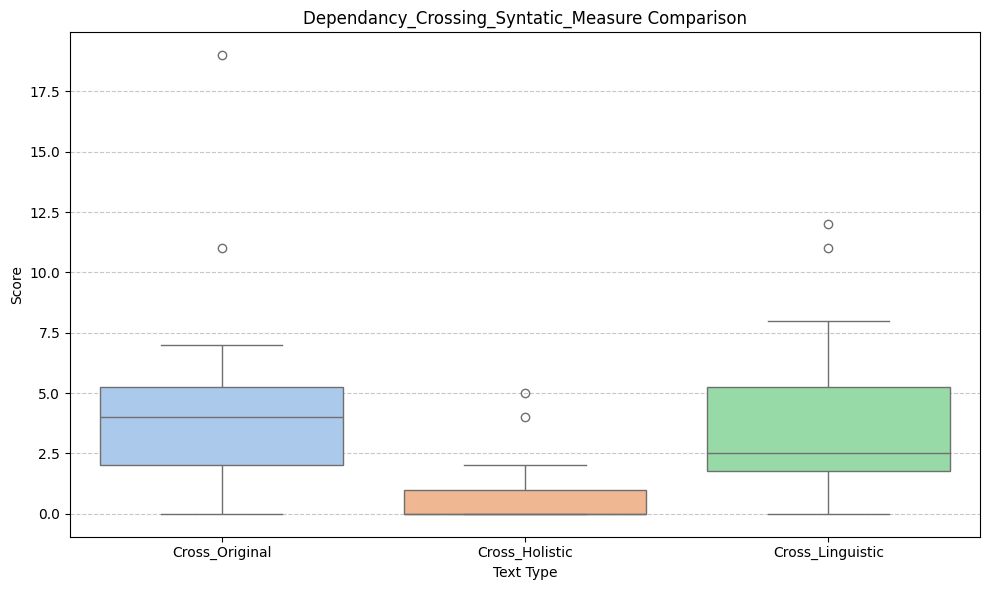

Plot saved to: plot_4_0/Dependancy_Crossing_Syntatic_Measure_readability_boxplot.png


In [ ]:
def count_dependency_crossings(text):
    doc = nlp(text)
    total_crossings = 0

    for sent in doc.sents:
        arcs = []
        for token in sent:
            if token.i == token.head.i or token.is_punct:
                continue
            head = token.head.i
            dep = token.i
            arcs.append((min(head, dep), max(head, dep)))

        # Count crossings between arcs
        for i in range(len(arcs)):
            for j in range(i + 1, len(arcs)):
                a_start, a_end = arcs[i]
                b_start, b_end = arcs[j]

                if (a_start < b_start < a_end < b_end) or (b_start < a_start < b_end < a_end):
                    total_crossings += 1

    return total_crossings
df["Cross_Original"] = df["Original"].apply(count_dependency_crossings)
df["Cross_Holistic"] = df["Holistic"].apply(count_dependency_crossings)
df["Cross_Linguistic"] = df["Linguistic"].apply(count_dependency_crossings)

print(df[["ID", "Cross_Original", "Cross_Holistic", "Cross_Linguistic"]])
plot_readability_scores(df, "Cross","Dependancy_Crossing_Syntatic_Measure", output_dir="plot_4_0")

# Readability Measures

### Wiener Sachtextformel (WSF)

A **readability measure** specifically developed for **German informational texts**, often used to assess how easy a text is to understand in public administration, education, and media.

---

### **How it works:**

The formula uses:

* **Average sentence length** (in words)
* **Average word length** (in syllables)
* **Percentage of polysyllabic words** (words with 3+ syllables)

There are **four versions** of the formula (WSF 1 to 4); the most common is **WSF 4**:

**Formula (WSF 4):**

$$
\text{WSF} = 0.1935 \cdot \text{ASL} + 0.1672 \cdot \text{PLW} + 0.1297 \cdot \text{PSW} - 0.0327
$$

Where:

* ASL = Average Sentence Length
* PLW = Average Word Length (in syllables)
* PSW = Percentage of polysyllabic words

**Scale:**

* **< 4**: very easy
* **4–5**: easy
* **5–6**: medium
* **6–7**: difficult
* **> 7**: very difficult

---

### Example:

Text: `"Das Bundesverfassungsgericht überprüft Gesetze auf Verfassungsmäßigkeit."`

* **Sentences** = 1
* **Words** = 7
* **Syllables per word**: z. B. Bundes-ver-fas-sungs-ge-richt → 6
* **Polysyllabic words** = 2 (`Bundesverfassungsgericht`, `Verfassungsmäßigkeit`)
* **Average Sentence Length** = 7
* **Average Word Length (syllables)** ≈ 2.86
* **Polysyllabic Word %** = 2 / 7 ≈ 28.6%

Insert into formula:

$$
\text{WSF} ≈ 0.1935 \cdot 7 + 0.1672 \cdot 2.86 + 0.1297 \cdot 28.6 - 0.0327 ≈ 1.3545 + 0.4782 + 3.7094 - 0.0327 = \mathbf{5.5094}
$$

---

A **WSF of 5.51** means:

* The text has **medium difficulty** — it might be challenging for readers with low literacy but is manageable for the average adult.


In [ ]:
!pip install pyphen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:00


       ID  WSF_Original  WSF_Holistic  WSF_Linguistic
0    BN_1          5.11          4.76            6.17
1   BN_10          7.72          4.27            6.77
2    BN_2          5.14          5.82            6.24
3    BN_3          4.97          8.33            6.25
4    BN_4          5.99          4.97            5.67
5    BN_5          4.87          6.20            7.19
6    BN_6          5.59          5.70            6.97
7    BN_7          5.42          4.72            6.40
8    BN_8          6.87          6.09            6.47
9    BN_9          5.29          6.38            7.16
10    K_1          6.95          6.32            6.64
11   K_10          5.81          4.96            7.38
12    K_2          6.24          3.43           10.00
13    K_3          6.64          5.12            6.46
14    K_4          6.94          5.75            7.16
15    K_5          6.48          5.32            5.96
16    K_6          7.01          5.85            7.12
17    K_7          6.63     

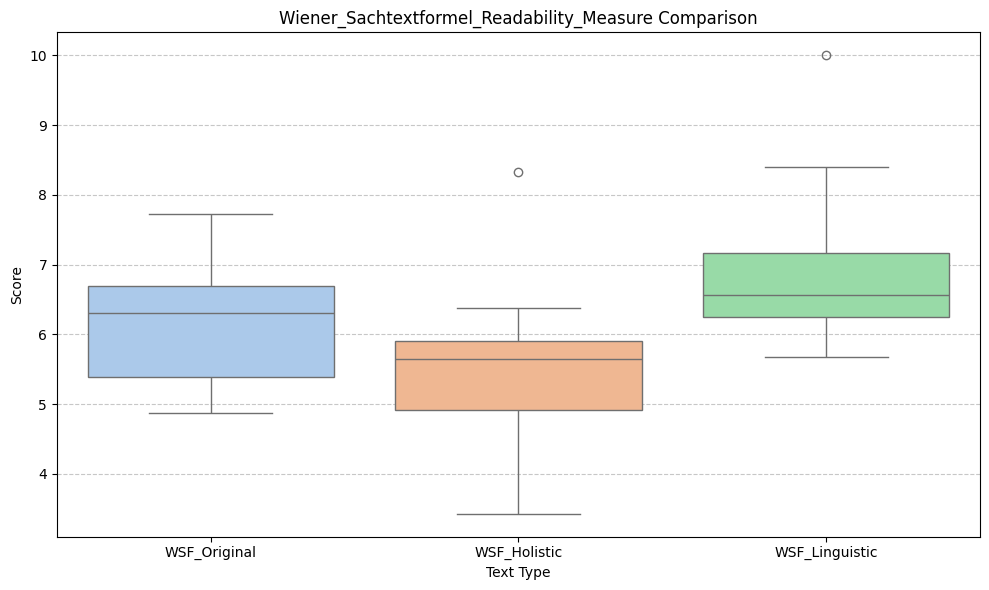

Plot saved to: plot_4_0/Wiener_Sachtextformel_Readability_Measure_readability_boxplot.png


In [ ]:
import pyphen

dic = pyphen.Pyphen(lang='de_DE')

def count_syllables(word):
    hyphenated = dic.inserted(word)
    return max(1, hyphenated.count('-') + 1)

def wiener_sachtextformel(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    words = [token.text for token in doc if token.is_alpha]

    if not words or not sentences:
        return 0.0

    # Calculations
    asl = len(words) / len(sentences)
    asw = sum(len(word) for word in words) / len(words)

    words_3plus_syllables = [word for word in words if count_syllables(word) >= 3]
    p3 = (len(words_3plus_syllables) / len(words)) * 100

    words_6plus_chars = [word for word in words if len(word) > 6]
    p1 = (len(words_6plus_chars) / len(words)) * 100

    # WSF (Wiener Sachtextformel 4)
    wsf = 0.1935 * asl + 0.1672 * p3 + 0.1297 * asw - 0.0327 * p1 - 0.875
    return round(wsf, 2)

df["WSF_Original"] = df["Original"].apply(wiener_sachtextformel)
df["WSF_Holistic"] = df["Holistic"].apply(wiener_sachtextformel)
df["WSF_Linguistic"] = df["Linguistic"].apply(wiener_sachtextformel)

print(df[["ID", "WSF_Original", "WSF_Holistic", "WSF_Linguistic"]])

plot_readability_scores(df, "WSF","Wiener_Sachtextformel_Readability_Measure", output_dir="plot_4_0")

### LIX (Lesbarkeitsindex)

**LIX** is a **readability formula** used to evaluate how difficult a text is to read. It is commonly applied to **German, Swedish, and other European languages**.

---

### **How it works:**

The formula considers:

* **Average sentence length** (words per sentence)
* **Percentage of long words** (words with more than 6 letters)

---

**Formula:**

$$
\text{LIX} = \frac{\text{Number of Words}}{\text{Number of Sentences}} + \frac{\text{Number of Long Words} \times 100}{\text{Number of Words}}
$$

---

### Interpretation:

| LIX Score | Reading Level  | Audience                     |
| --------- | -------------- | ---------------------------- |
| 0–24      | Very Easy      | Children                     |
| 25–34     | Easy           | Young students               |
| 35–44     | Medium         | General readers              |
| 45–54     | Difficult      | Advanced texts               |
| 55+       | Very Difficult | Academic, official documents |

---

### Example:

Text: `"Die Bundesregierung diskutiert über Steuererhöhungen für internationale Konzerne."`

* **Words** = 9
* **Sentences** = 1
* **Long words** (>6 letters): 4

  * "Bundesregierung", "diskutiert", "Steuererhöhungen", "internationale"
* Average sentence length = 9 / 1 = 9
* Percentage of long words = 4 / 9 × 100 ≈ 44.44

**LIX:**

$$
\text{LIX} = 9 + 44.44 ≈ \mathbf{53.44}
$$

---

A **LIX of 53.44** means:

* The text is **difficult**, possibly requiring a **higher education level** or advanced German skills to understand easily.


       ID  LIX_Original  LIX_Holistic  LIX_Linguistic
0    BN_1         45.60         39.06           48.93
1   BN_10         55.95         33.24           50.71
2    BN_2         41.50         43.94           47.00
3    BN_3         40.14         58.27           47.35
4    BN_4         49.92         45.56           47.34
5    BN_5         43.66         46.01           54.98
6    BN_6         47.11         47.30           52.62
7    BN_7         44.68         40.19           51.63
8    BN_8         52.27         46.76           49.40
9    BN_9         48.24         48.82           54.63
10    K_1         55.41         47.59           51.06
11   K_10         48.88         39.83           55.71
12    K_2         48.11         31.87           69.13
13    K_3         52.27         47.05           51.31
14    K_4         56.55         46.81           56.79
15    K_5         49.58         41.87           46.19
16    K_6         54.47         45.79           54.31
17    K_7         52.30     

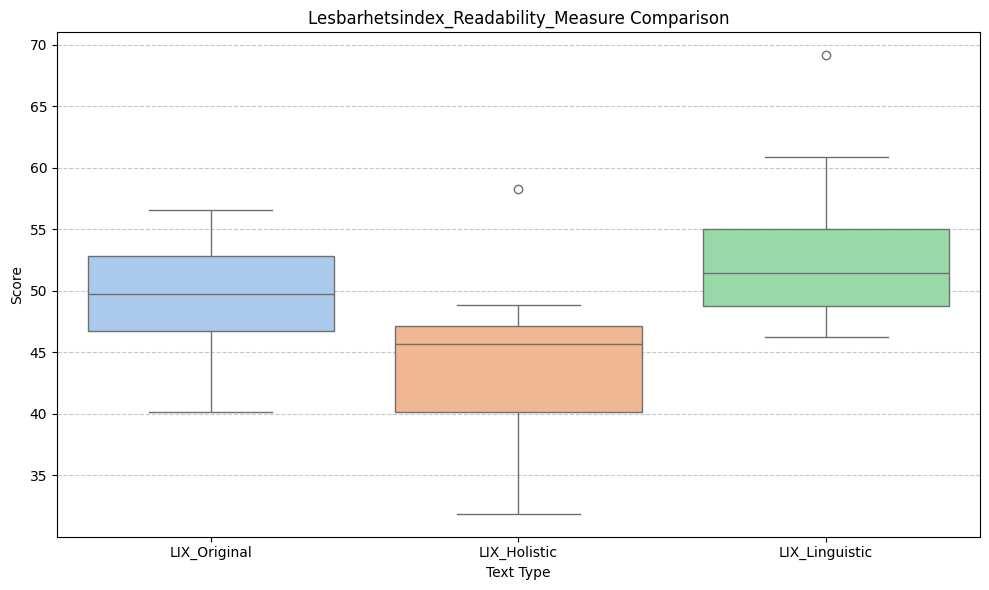

Plot saved to: plot_4_0/Lesbarhetsindex_Readability_Measure_readability_boxplot.png


In [ ]:

def lix_score(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    words = [token.text for token in doc if token.is_alpha]

    num_sentences = len(sentences)
    num_words = len(words)
    num_long_words = sum(1 for word in words if len(word) >= 7)

    if num_sentences == 0 or num_words == 0:
        return 0.0

    lix = (num_words / num_sentences) + (num_long_words * 100 / num_words)
    return round(lix, 2)
df["LIX_Original"] = df["Original"].apply(lix_score)
df["LIX_Holistic"] = df["Holistic"].apply(lix_score)
df["LIX_Linguistic"] = df["Linguistic"].apply(lix_score)

print(df[["ID", "LIX_Original", "LIX_Holistic", "LIX_Linguistic"]])

plot_readability_scores(df, "LIX","Lesbarhetsindex_Readability_Measure", output_dir="plot_4_0")

### Amstad's Flesch Reading Ease (FRE)

An adaptation of the original English Flesch Reading Ease formula designed for the specific characteristics of the German language.

---

### How it works:

Amstad modified the original FRE formula to better fit German syntax, morphology, and compound word structures.

---

### Formula:

Amstad’s adapted FRE for German:

$$
\text{FRE}_{DE} = 180 - \text{ASL} - (58.5 \times \text{ASW})
$$

Where:

* ASL = Average Sentence Length (words per sentence)
* ASW = Average number of syllables per word

---

### Score Interpretation:

| FRE Score | Reading Difficulty | Description                       |
| --------- | ------------------ | --------------------------------- |
| 90–100    | Very easy          | Simple sentences, basic words     |
| 70–89     | Easy               | Clear and simple                  |
| 50–69     | Medium             | Standard prose                    |
| 30–49     | Difficult          | Complex sentence structure        |
| 0–29      | Very difficult     | Academic or bureaucratic language |

---

### Example:

Text: "Die Bundesverfassung überprüft regelmäßig neue Gesetzesvorschläge."

* Sentences: 1
* Words: 7
* Syllables: 19
* ASL = 7
* ASW = 19 ÷ 7 ≈ 2.71

Now compute:

$$
\text{FRE}_{DE} = 180 - 7 - (58.5 \times 2.71) ≈ 180 - 7 - 158.54 = \mathbf{14.46}
$$

---

A FRE score of 14.46 indicates:

→ Very difficult to read
→ Suitable for legal or academic professionals, not for general public communication



       ID  FRE_Original  FRE_Holistic  FRE_Linguistic
0    BN_1         41.04         63.58           50.85
1   BN_10         33.99         65.28           43.92
2    BN_2         55.15         58.30           49.95
3    BN_3         44.29         31.51           44.07
4    BN_4         43.93         58.80           44.27
5    BN_5         53.05         52.22           44.38
6    BN_6         44.48         59.24           38.99
7    BN_7         45.31         57.36           47.82
8    BN_8         41.82         58.62           49.91
9    BN_9         52.51         59.39           50.95
10    K_1         21.61         48.43           40.77
11   K_10         40.63         56.23           40.01
12    K_2         40.99         72.86           15.17
13    K_3         33.37         58.43           45.85
14    K_4         25.23         50.18           33.97
15    K_5         39.02         53.52           49.49
16    K_6         36.27         54.36           35.27
17    K_7         42.50     

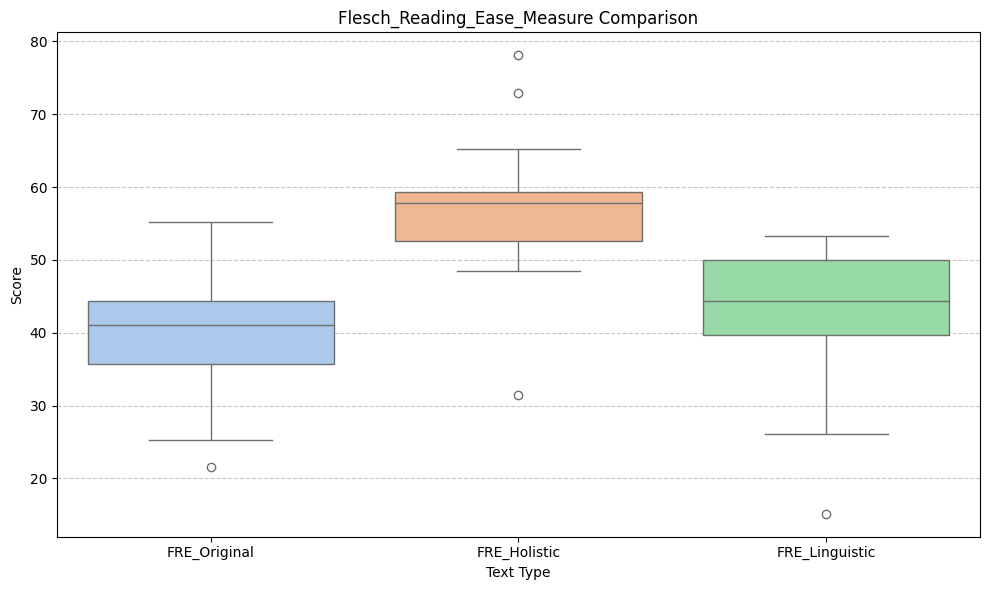

Plot saved to: plot_4_0/Flesch_Reading_Ease_Measure_readability_boxplot.png


In [ ]:
def count_syllables(word):
    hyphenated = dic.inserted(word)
    return max(1, hyphenated.count('-') + 1)

def flesch_reading_ease_amstad(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    words = [token.text for token in doc if token.is_alpha]

    if not words or not sentences:
        return 0.0

    asl = len(words) / len(sentences)
    total_syllables = sum(count_syllables(word) for word in words)
    asw = total_syllables / len(words)

    fre_de = 180 - asl - (58.5 * asw)
    return round(fre_de, 2)


df["FRE_Original"] = df["Original"].apply(flesch_reading_ease_amstad)
df["FRE_Holistic"] = df["Holistic"].apply(flesch_reading_ease_amstad)
df["FRE_Linguistic"] = df["Linguistic"].apply(flesch_reading_ease_amstad)

print(df[["ID", "FRE_Original", "FRE_Holistic", "FRE_Linguistic"]])
plot_readability_scores(df, "FRE","Flesch_Reading_Ease_Measure", output_dir="plot_4_0")

### Gunning Fog Index

The Gunning Fog Index estimates the number of years of formal education a person needs to understand a text on the first reading.

---

### How it works:

It considers:

* Average sentence length (in words)
* Percentage of complex words (words with 3 or more syllables)

—

Note: For German, compound words and inflected forms may increase the count of complex words.

—

### Formula:

$$
\text{Fog Index} = 0.4 \times \left( \frac{\text{Total Words}}{\text{Total Sentences}} + 100 \times \frac{\text{Complex Words}}{\text{Total Words}} \right)
$$

Where:

* Complex words = ≥ 3 syllables (excluding proper nouns, familiar words, and compound prefixes like “un-”, “be-” if handled)

---

### Example:

Text:
"Die Bundesregierung plant umfangreiche Investitionen in erneuerbare Energien."

* Sentences: 1
* Words: 9
* Complex Words (≥ 3 syllables): 4

  * Bundesregierung, umfangreiche, Investitionen, erneuerbare

Now compute:

Average sentence length = 9 / 1 = 9
Complex word percentage = 4 / 9 ≈ 0.444

Apply the formula:

$$
\text{Fog Index} = 0.4 \times (9 + 100 \times 0.444) = 0.4 \times (9 + 44.4) = 0.4 \times 53.4 = \mathbf{21.36}
$$

—

A Fog Index of 21.36 means:

* Very hard to understand
* Suitable for readers with postgraduate education
* Not ideal for general audiences


       ID  Fog_Original  Fog_Holistic  Fog_Linguistic
0    BN_1         13.79         12.98           15.69
1   BN_10         17.59         10.78           15.73
2    BN_2         14.00         14.62           15.86
3    BN_3         13.72         20.83           16.25
4    BN_4         15.64         12.96           15.26
5    BN_5         12.44         15.00           16.66
6    BN_6         14.28         13.59           17.30
7    BN_7         14.57         12.74           16.31
8    BN_8         17.95         15.75           16.85
9    BN_9         12.51         14.62           16.62
10    K_1         17.24         16.07           16.73
11   K_10         15.57         13.77           18.30
12    K_2         15.66          9.47           24.24
13    K_3         16.56         13.82           16.77
14    K_4         17.72         14.67           18.60
15    K_5         16.28         13.15           15.37
16    K_6         17.56         15.76           17.44
17    K_7         16.77     

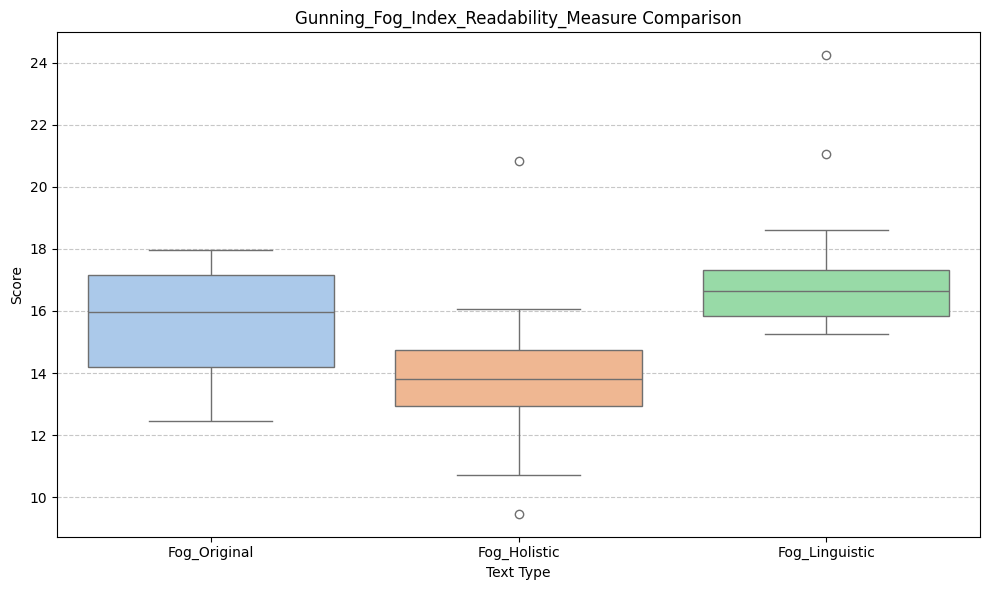

Plot saved to: plot_4_0/Gunning_Fog_Index_Readability_Measure_readability_boxplot.png


In [ ]:

def count_syllables(word):
    return max(1, dic.inserted(word).count("-") + 1)

def gunning_fog_index(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    words = [token for token in doc if token.is_alpha]

    if not sentences or not words:
        return 0.0

    asl = len(words) / len(sentences)

    # Complex words: 3+ syllables, not stop words, not proper nouns
    complex_words = [
        token for token in words
        if count_syllables(token.text) >= 3 and not token.is_stop and not token.ent_type_
    ]
    percent_complex = (len(complex_words) / len(words)) * 100

    fog = 0.4 * (asl + percent_complex)
    return round(fog, 2)
df["Fog_Original"] = df["Original"].apply(gunning_fog_index)
df["Fog_Holistic"] = df["Holistic"].apply(gunning_fog_index)
df["Fog_Linguistic"] = df["Linguistic"].apply(gunning_fog_index)

print(df[["ID", "Fog_Original", "Fog_Holistic", "Fog_Linguistic"]])
plot_readability_scores(df, "Fog", "Gunning_Fog_Index_Readability_Measure",output_dir="plot_4_0")


In [ ]:
df.to_csv('Matrix_Scores_GPT4_0.csv', index=False)
#df.to_csv('Matrix_Scores_GPT4_0.csv', index=False)

# Conll Files generation

In [ ]:
# Install necessary packages
!pip install --quiet stanza click

# Download German model for stanza
import stanza
stanza.download("de")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 849.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 31.5 MB/s eta 0:00:00


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: de (German) ...


INFO:stanza:Downloaded file to /root/stanza_resources/de/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


## Generating conll file,
* _E for Holistic
* _H for linguistic


In [ ]:
df

,ID,Original,Holistic,Linguistic,TTR_Original,TTR_Holistic,TTR_Linguistic,LD_Original,LD_Holistic,LD_Linguistic,...,WSF_Linguistic,LIX_Original,LIX_Holistic,LIX_Linguistic,FRE_Original,FRE_Holistic,FRE_Linguistic,Fog_Original,Fog_Holistic,Fog_Linguistic
0,BN_1,BAföG (für Schüler) __________________________...,BAföG (für Schüler) BAföG ist eine finanziell...,BAföG (für Schüler) Das BAföG ist eine finan...,0.673,0.587,0.549,0.497,0.471,0.469,...,6.17,45.60,39.06,48.93,41.04,63.58,50.85,13.79,12.98,15.69
1,BN_10,"Eltern, die in der Stadt Hildesheim ihren Wohn...",In Hildesheim können Eltern für ihre Babys Elt...,"Eltern, die in der Stadt Hildesheim ihren Wohn...",0.601,0.541,0.487,0.508,0.447,0.501,...,6.77,55.95,33.24,50.71,33.99,65.28,43.92,17.59,10.78,15.73
2,BN_2,Fundsachen ___________________________________...,Wenn du etwas Wertvolles (das mehr als 10 Euro...,Gefundene Wertgegenstände mit einem Gegenwert ...,0.545,0.680,0.540,0.494,0.426,0.456,...,6.24,41.50,43.94,47.00,55.15,58.30,49.95,14.00,14.62,15.86
3,BN_3,"Kindertagesstätte, Platzvermittlung und Voranm...","Der Kita-Finder ist eine Webseite, auf der Elt...","Der Kita-Finder ist eine Webseite, auf der Sie...",0.635,0.691,0.634,0.453,0.443,0.410,...,6.25,40.14,58.27,47.35,44.29,31.51,44.07,13.72,20.83,16.25
4,BN_4,Allgemeine Informationen Sie sind aus Ihrer W...,Du bist aus deiner Wohnung in Hannover ausgezo...,Allgemeine Informationen: Sie sind aus Ihrer...,0.591,0.789,0.582,0.494,0.434,0.490,...,5.67,49.92,45.56,47.34,43.93,58.80,44.27,15.64,12.96,15.26
5,BN_5,Elterngeld und Elternzeit ____________________...,Elterngeld und Elternzeit sind Leistungen vom ...,Elterngeld und Elternzeit Elterngeld ist ein...,0.512,0.610,0.517,0.502,0.496,0.487,...,7.19,43.66,46.01,54.98,53.05,52.22,44.38,12.44,15.00,16.66
6,BN_6,Führungszeugnis _____________________________...,"Das Führungszeugnis ist eine Urkunde, die man ...",Informationen zum Beantragen eines Führungszeu...,0.487,0.700,0.478,0.496,0.489,0.475,...,6.97,47.11,47.30,52.62,44.48,59.24,38.99,14.28,13.59,17.30
7,BN_7,Zweitwohnungssteuer _________________________...,"Es gibt eine neue Steuer, die Zweitwohnungsste...",Die Zweitwohnungssteuer ist eine örtliche Steu...,0.581,0.643,0.571,0.480,0.464,0.458,...,6.40,44.68,40.19,51.63,45.31,57.36,47.82,14.57,12.74,16.31
8,BN_8,Anmeldung einer Eheschliessung Die beabsichti...,"Wenn du heiraten möchtest, musst du das beim S...",Anmeldung einer Eheschließung Wenn man heira...,0.547,0.671,0.555,0.519,0.483,0.487,...,6.47,52.27,46.76,49.40,41.82,58.62,49.91,17.95,15.75,16.85
9,BN_9,Eintragung in das Wählerverzeichnis zur Landta...,Du darfst bei der Landtagswahl in Niedersachse...,Eintragung in das Wählerverzeichnis zur Landta...,0.407,0.737,0.410,0.458,0.404,0.399,...,7.16,48.24,48.82,54.63,52.51,59.39,50.95,12.51,14.62,16.62


In [ ]:
import pandas as pd
from pathlib import Path
import stanza
from stanza.utils.conll import CoNLL

# Initialize German NLP pipeline
nlp = stanza.Pipeline(lang="de", processors="tokenize,mwt,pos,lemma,depparse")

# Paths to save files
txt_dir = Path("txt")
conllu_dir = Path("conllu")
txt_dir.mkdir(exist_ok=True)
conllu_dir.mkdir(exist_ok=True)


# Iterate over each row
for _, row in df.iterrows():
    id_val = row["ID"]
    text = row["Original"]
    holistic = row["Holistic"]
    linguistic = row["Linguistic"]

    id_base = id_val.removesuffix("B")
    text_filename = f"{id_val}.txt"
    holistic_filename = f"{id_base}E.txt"
    linguistic_filename = f"{id_base}H.txt"

    # Save text versions
    (txt_dir / text_filename).write_text(text, encoding="utf-8")
    (txt_dir / holistic_filename).write_text(holistic, encoding="utf-8")
    (txt_dir / linguistic_filename).write_text(linguistic, encoding="utf-8")

    # Process with Stanza and save as CoNLL
    for fname in [text_filename, holistic_filename, linguistic_filename]:
        txt_path = txt_dir / fname
        conllu_path = conllu_dir / fname.replace(".txt", ".conllu")

        input_text = txt_path.read_text(encoding="utf-8")
        doc = nlp(input_text)
        CoNLL.write_doc2conll(doc, conllu_path)


print("✅ All files saved with B replaced at the end and placed in correct folders.")


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: de (German):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


KeyboardInterrupt: 

In [ ]:
import shutil
from google.colab import files

shutil.make_archive('conllu', 'zip', 'conllu')
files.download('conllu.zip')


shutil.make_archive('txt', 'zip', 'txt')
files.download('txt.zip')


In [ ]:
import shutil
from google.colab import files
shutil.make_archive('plot_4_0', 'zip', 'plot_4_0')
files.download('plot_4_0.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The Eiffel Tower is 324 meters (1,063 feet) tall, including its antenna. If we exclude the antenna, it stands at 300 meters (984 feet). Built in 1889, it held the title of the tallest man-made structure in the world for over four decades, until it was surpassed by the Chrysler Building in New York in 1930.


meta-llama-3.1-8b-instruct
gemma-3-27b-it
qwen3-32b
qwen3-235b-a22b
llama-3.3-70b-instruct
qwen2.5-vl-72b-instruct
medgemma-27b-it
qwq-32b
deepseek-r1
deepseek-r1-distill-llama-70b
mistral-large-instruct
qwen2.5-coder-32b-instruct
internvl2.5-8b
teuken-7b-instruct-research
codestral-22b
llama-3.1-sauerkrautlm-70b-instruct
meta-llama-3.1-8b-rag
